# Assignment 17 - Linear programming
Bartosz Tuzel, Jan Widanka

The students from class 3A of the Desert City High School have been given an offer to take part in a summer camp organized by the school. The students in the class are given in the table below:

<div>
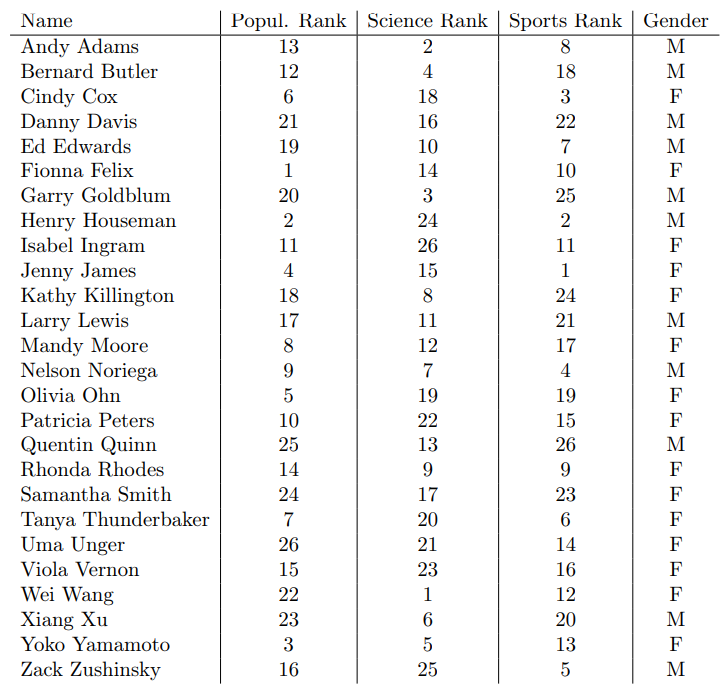
</div>

The students may choose the people going to the camp, given that the following constraints (imposed by the
school) are satisfied:

$\hspace{0.7em}$   • Exactly $15$ people can go to the camp. $\newline$
$\hspace{0.7em}$   • Gender parity rules are applied, i.e. at most $60\%$ of students going to the camp are males and at most
                     $60\%$ are females. $\newline$
$\hspace{0.7em}$   • The average science ranking of kids going to the camp cannot be lower than $70\%$ of the average science
                     ranking in the entire class. $\newline$
$\hspace{0.7em}$   • The average sports ranking of kids going to the camp cannot be lower than $70\%$ of the average sports
                     ranking in the entire class. 

Find the set of people going to the camp, assuming that the students have made their choice trying to minimize
the average popularity ranking.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pulp

In [2]:
data = {'Name': ['Andy Adams', 'Bernard Butler', 'Cindy Cox', 'Danny Davis', 'Ed Edwards', 'Fionna Felix', 'Garry Goldblum',
                'Henry Houseman', 'Isabel Ingram', 'Jenny James', 'Kathy Killington', 'Larry Lewis', 'Mandy Moore',
                'Nelson Noriega', 'Olivia Ohn', 'Patricia Peters', 'Quentin Quinn', 'Rhonda Rhodes', 'Samantha Smith',
                'Tanya Thunderbaker', 'Uma Unger', 'Viola Vernon ', 'Wei Wang', 'Xiang Xu', 'Yoko Yamamoto', 'Zack Zushinsky'],
        'Popul_rank': [13, 12, 6, 21, 19, 1, 20, 2, 11, 4, 18, 17, 8, 9, 5, 10, 25, 14, 24, 7, 26, 15, 22, 23, 3, 16],
        'Science_rank': [2, 4, 18, 16, 10, 14, 3, 24, 26, 15, 8, 11, 12, 7, 19, 22, 13, 9, 17, 20, 21, 23, 1, 6, 5, 25],
        'Sports_rank': [8, 18, 3, 22, 7, 10, 25, 2, 11, 1, 24, 21, 17, 4, 19, 15, 26, 9, 23, 6, 14, 16, 12, 20, 13, 5],
        'Gender': ['M', 'M', 'F', 'M', 'M', 'F', 'M', 'M', 'F', 'F', 'F', 'M', 'F', 'M', 'F', 'F', 'M', 'F','F','F','F',
                  'F','F', 'M', 'F', 'M']}

In [3]:
summer_camp_students = pd.DataFrame(data)
summer_camp_students = summer_camp_students.set_index('Name')

In [4]:
summer_camp_students['Gender'] = pd.factorize(summer_camp_students['Gender'])[0] # 0 - male, 1 - female

In [5]:
summer_camp_students

,Popul_rank,Science_rank,Sports_rank,Gender
Name,,,,
Andy Adams,13,2,8,0
Bernard Butler,12,4,18,0
Cindy Cox,6,18,3,1
Danny Davis,21,16,22,0
Ed Edwards,19,10,7,0
Fionna Felix,1,14,10,1
Garry Goldblum,20,3,25,0
Henry Houseman,2,24,2,0
Isabel Ingram,11,26,11,1


## LP problem

First of all we want to write our decision variables. We will do that as follows:
- $x_{i}$: indicator of whether the i-th student is chosen to go on the camp or not,
- $p_{i}$: popularity ranking of i-th student,
- $g_{i}$: gender of i-th student,
- $s_{i}$: sport ranking of i-th student,
- $k_{i}$: science ranking of i-th student.

We define our linear problem in the following way:

\begin{equation}
\begin{split}
\textit{minimize} \hspace{0.7em} &\frac1{15} \displaystyle\sum\limits_{i=1}^{n} p_{i}x_{i} \\
\textit{subject to} \hspace{0.7em} \displaystyle&\sum\limits_{i=1}^{n}x_{i} = 15 \\
                                     &\frac1{15} \displaystyle\sum\limits_{i=1}^{n} g_{i} x_{i} \leq 0.6 \\
                                     & \frac1{15} \displaystyle\sum\limits_{i=1}^{n} s_{i} x_{i} \leq 9.45 \\
                                     & \frac1{15} \displaystyle\sum\limits_{i=1}^{n} k_{i} x_{i} \leq 9.45
\end{split}
\end{equation}

In [48]:
sport_ranks = summer_camp_students['Sports_rank']
science_ranks = summer_camp_students['Science_rank']
genders = summer_camp_students['Gender']
popularity = summer_camp_students['Popul_rank']

In [49]:
genders

Name
Andy Adams            0
Bernard Butler        0
Cindy Cox             1
Danny Davis           0
Ed Edwards            0
Fionna Felix          1
Garry Goldblum        0
Henry Houseman        0
Isabel Ingram         1
Jenny James           1
Kathy Killington      1
Larry Lewis           0
Mandy Moore           1
Nelson Noriega        0
Olivia Ohn            1
Patricia Peters       1
Quentin Quinn         0
Rhonda Rhodes         1
Samantha Smith        1
Tanya Thunderbaker    1
Uma Unger             1
Viola Vernon          1
Wei Wang              1
Xiang Xu              0
Yoko Yamamoto         1
Zack Zushinsky        0
Name: Gender, dtype: int64

In [61]:
# Placeholder data for average science and sports rankings
avg_science_ranking = np.mean(sport_ranks)
avg_sports_ranking = np.mean(science_ranks)

# Placeholder data for gender distribution
total_students = len(popularity)
total_camp_students = 15

# Create a problem instance
prob = pulp.LpProblem("Student_Selection", pulp.LpMinimize)

# Decision variables (binary variables representing student selection)
students = [i for i in range(total_students)]
x = pulp.LpVariable.dicts("Student", students, cat=pulp.LpBinary)

# Placeholder data for science and sports rankings of students
science_rankings = dict(zip(students, list(science_ranks)))
sports_rankings = dict(zip(students, list(sport_ranks)))

# Objective function: Minimize the average popularity ranking
prob += (1 / total_camp_students) * pulp.lpSum((x[i] * list(popularity)[i]) for i in students) 

# Constraints
# Exactly 15 students can go to the camp
prob += pulp.lpSum(x[i] for i in students) == total_camp_students

# Gender parity constraints
prob += (1 / total_camp_students) * pulp.lpSum(x[i] for i in students if list(genders)[i] == 1) <= 0.6
prob += (1 / total_camp_students) * pulp.lpSum(x[i] for i in students if list(genders)[i] == 0) <= 0.6

# Average science ranking constraint
prob += (1 / total_camp_students) * pulp.lpSum(science_rankings[i] * x[i] for i in students) >= 0.7 * avg_science_ranking

# Average sports ranking constraint
prob += (1 / total_camp_students) * pulp.lpSum(sports_rankings[i] * x[i] for i in students) >= 0.7 * avg_sports_ranking

# Solve the problem
prob.solve()

# Check the status of the solution
print("Status:", pulp.LpStatus[prob.status])

# Retrieve the solution
selected_students = [i for i in students if pulp.value(x[i]) == 1]
print("Selected students:", selected_students)

Status: Optimal
Selected students: [0, 1, 2, 5, 7, 8, 9, 11, 12, 13, 14, 15, 19, 24, 25]


In [62]:
pulp.value(prob.objective)

8.266666666666667

### Checking the correctness

In [70]:
selected_students_indices = [0, 1, 2, 5, 7, 8, 9, 11, 12, 13, 14, 15, 19, 24, 25]

In [71]:
selected_studs = summer_camp_students.iloc[selected_students_indices]

In [72]:
selected_studs

,Popul_rank,Science_rank,Sports_rank,Gender
Name,,,,
Andy Adams,13,2,8,0
Bernard Butler,12,4,18,0
Cindy Cox,6,18,3,1
Fionna Felix,1,14,10,1
Henry Houseman,2,24,2,0
Isabel Ingram,11,26,11,1
Jenny James,4,15,1,1
Larry Lewis,17,11,21,0
Mandy Moore,8,12,17,1


In [73]:
selected_studs['Science_rank'].mean()

14.933333333333334

In [74]:
selected_studs['Sports_rank'].mean()

10.2

In [77]:
selected_studs['Gender'].value_counts()

1    9
0    6
Name: Gender, dtype: int64